# Visualisation

## Principal component analysis

[[-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]
 [-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]
 [-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]
 ...
 [-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]
 [-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]
 [-0.0148165  -0.03760239 -0.06245122 ... -0.14119802 -0.06592056
  -0.02908531]]
         PC1        PC2     Category
0  -0.504663   2.608573  T-shirt/top
1 -18.182703   0.285265     Trousers
2   5.345144  -2.348569  T-shirt/top
3 -11.084712   1.340172        Dress
4  -1.613810  10.749582        Shirt


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

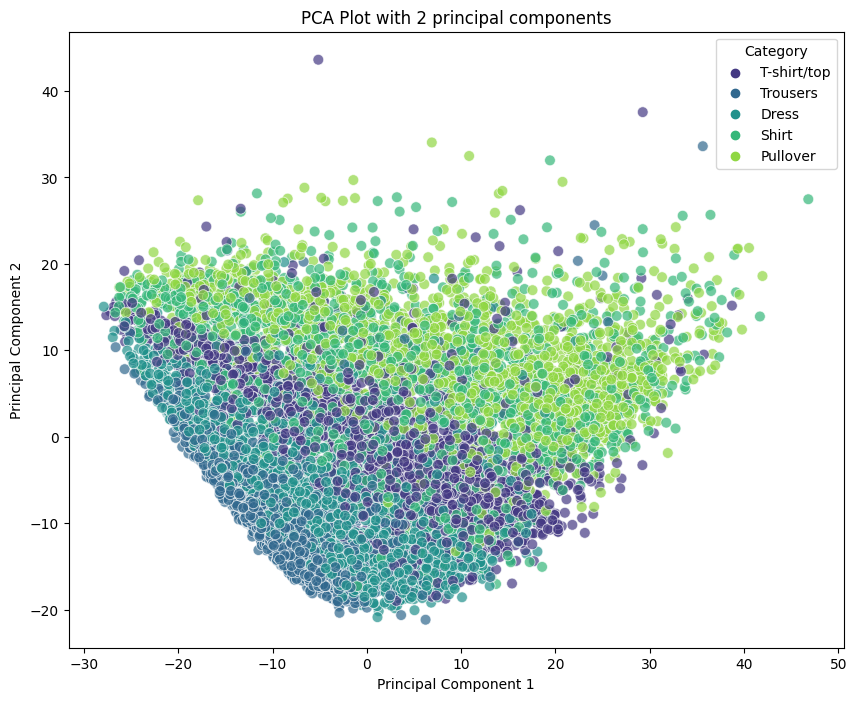

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
print(X_train_standardized)

# Apply PCA to the standardized data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_train_standardized)

# Create a DataFrame with the first two principal components and labels
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Category'] = y_train_strings

print(pc_df.head())

# Visualize the PCA plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Category', data=pc_df, palette='viridis', s=60, alpha=0.7)
plt.title('PCA Plot with 2 principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Category')
plt.show()


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

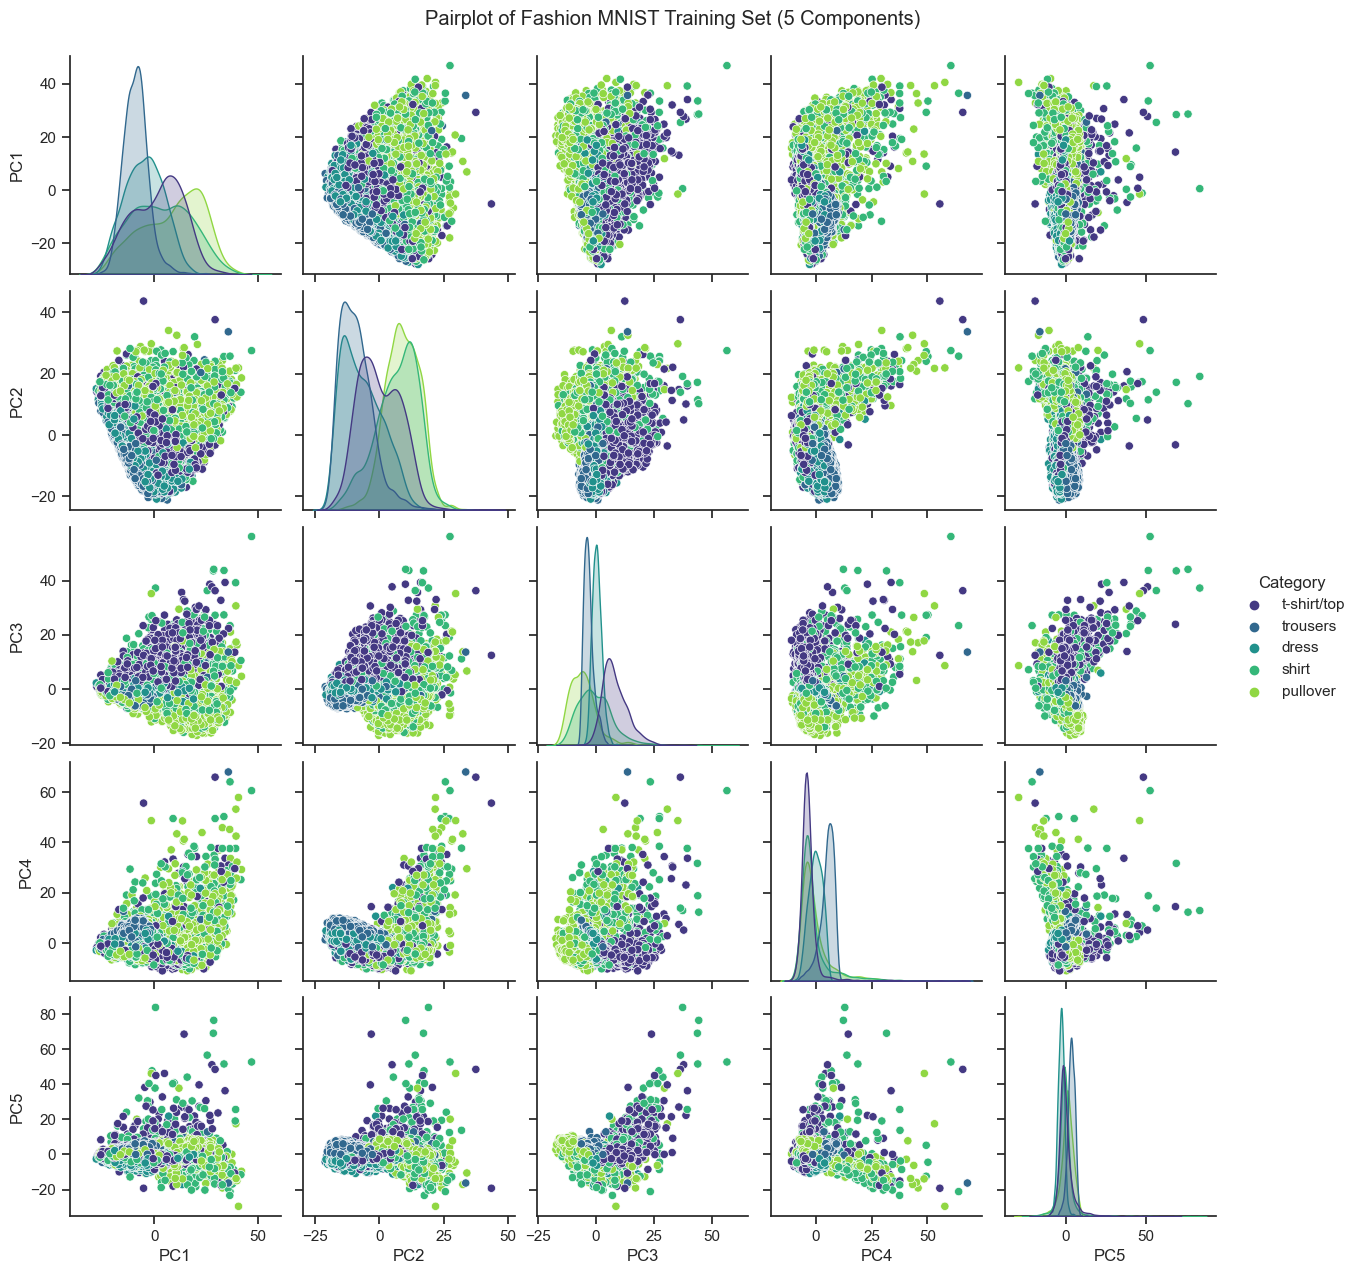

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "t-shirt/top", 1: "trousers", 2: "pullover", 3: "dress", 4: "shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

# Apply PCA to the standardized data with 5 components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_train_standardized)

# Create a DataFrame with the first five principal components and labels
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pc_df['Category'] = y_train_strings

# Visualize the pairplot using Seaborn
sns.set(style="ticks", color_codes=True)
sns.pairplot(pc_df, hue='Category', palette='viridis', markers='o', diag_kind='kde')
plt.suptitle('Pairplot of Fashion MNIST Training Set (5 Components)', y=1.02)
plt.show()


## Linear Discriminant Analysis

/var/folders/wk/rb21vvx97h93d00px44d7_yr0000gn/T/ipykernel_74352/2691559089.py:47: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter, eigvals=(num_features - num_components, num_features - 1))


        LD1       LD2     Category
0 -0.018059  0.002138  T-shirt/top
1  0.059630 -0.013965     Trousers
2 -0.011862  0.001460  T-shirt/top
3  0.002350  0.009344        Dress
4 -0.000875 -0.008360        Shirt


/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

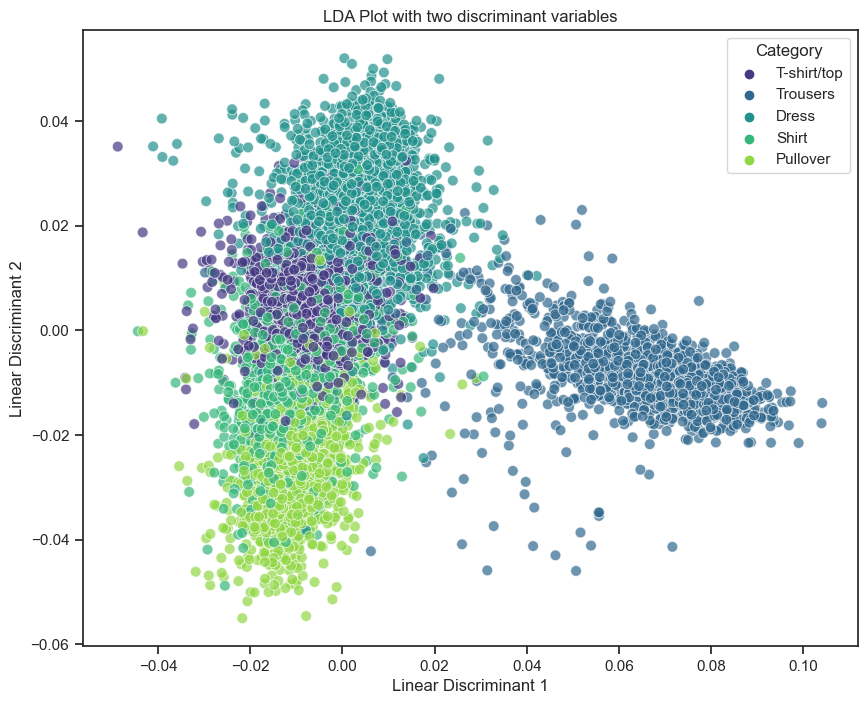

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def lda(X, y, num_components=2, shrinkage=1e-2):
    """
    Linear Discriminant Analysis (LDA) implementation.

    Parameters:
    - X: Feature matrix (n_samples, n_features)
    - y: Class labels (n_samples,)
    - num_components: Number of linear discriminant components to keep

    Returns:
    - lda_components: Linear discriminant components (n_features, num_components)
    - explained_variance: Explained variance by each linear discriminant component
    """

    classes = np.unique(y)
    num_classes = len(classes)
    num_features = X.shape[1]

    # Compute class means
    class_means = np.array([np.mean(X[y == c], axis=0) for c in classes])

    # Compute overall mean
    overall_mean = np.mean(X, axis=0)

    # Compute between-class scatter matrix
    between_class_scatter = np.zeros((num_features, num_features))
    for c in classes:
        n = len(y[y == c])
        mean_diff = class_means[c] - overall_mean
        between_class_scatter += n * np.outer(mean_diff, mean_diff)

    # Compute within-class scatter matrix
    within_class_scatter = np.zeros((num_features, num_features))
    for c in classes:
        class_data = X[y == c]
        mean_diff = class_data - class_means[c]
        within_class_scatter += np.dot(mean_diff.T, mean_diff)

# Add shrinkage to the within-class scatter matrix
    within_class_scatter += shrinkage * np.eye(num_features)

    # Solve the generalized eigenvalue problem for (S_w)^(-1) * S_b
    eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter, eigvals=(num_features - num_components, num_features - 1))

    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top num_components eigenvectors
    lda_components = eigenvectors[:, :num_components]

    # Compute explained variance
    explained_variance = eigenvalues[:num_components] / np.sum(eigenvalues)

    return lda_components, explained_variance

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_train_strings = np.array([label_mapping[label] for label in y_train])

# Apply LDA to the data
lda_components, explained_variance = lda(X_train, y_train, num_components=2)

# Project the data onto the first two linear discriminant components
lda_projection = np.dot(X_train, lda_components)

# Create a DataFrame with the linear discriminant components and labels
lda_df = pd.DataFrame(data=lda_projection, columns=['LD1', 'LD2'])
lda_df['Category'] = y_train_strings
print(lda_df.head())

# Visualize the LDA plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LD1', y='LD2', hue='Category', data=lda_df, palette='viridis', s=60, alpha=0.7)
plt.title('LDA Plot with two discriminant variables')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()

# Classification

## Naive Bayes Classifier

In [72]:
import numpy as np
from scipy.stats import multivariate_normal

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels from the training data
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping_train = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_train_strings = np.array([label_mapping_train[label] for label in y_train])

# Apply LDA to the training data
lda_components_train, explained_variance_train = lda(X_train, y_train, num_components=2)

# Project the training data onto the first two linear discriminant components
lda_projection_train = np.dot(X_train, lda_components_train)

# Compute min and max values for each feature in the training data
min_vals_train_lda = np.min(lda_projection_train, axis=0)
max_vals_train_lda = np.max(lda_projection_train, axis=0)

# Load the Fashion MNIST test data
test_data = np.load('fashion_test.npy')

# Extract features (pixel values) and labels from the test data
X_test = test_data[:, :-1]  # Features (pixel values)
y_test = test_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping_test = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_test_strings = np.array([label_mapping_test[label] for label in y_test])

# Apply Linear Discriminant Analysis (LDA) to the test data
lda_components_test, explained_variance_test = lda(X_test, y_test, num_components=2)

# Project the test data onto the first two linear discriminant components
lda_projection_test = np.dot(X_test, lda_components_test)

def min_max_scaling_with_params(data, min_val, max_val, feature_range=(0, 1)):
    """
    Scale the data to the specified feature range using min-max scaling.

    Parameters:
    - data: Input data (n_samples, n_features)
    - min_val: Minimum values for each feature
    - max_val: Maximum values for each feature
    - feature_range: Tuple (min, max) specifying the desired range

    Returns:
    - scaled_data: Scaled data
    """
    
    # Ensure there are no divisions by zero
    max_val[max_val == min_val] = min_val[max_val == min_val] + 1.0

    # Calculate the scaling factor and minimum range for scaling
    scale = feature_range[1] - feature_range[0]
    min_range = feature_range[0]

    # Perform min-max scaling on the data
    # Formula: scaled_data = (data - min_val) / (max_val - min_val) * scale + min_range
    scaled_data = (data - min_val) / (max_val - min_val) * scale + min_range

    # Return the scaled data
    return scaled_data


def calculate_non_parametric_estimates(X_lda, y, num_components=2, bandwidth=0.001):
    """
    Calculate non-parametric estimates (Kernel Density Estimation) for each class.

    Parameters:
    - X_lda: Projected data onto the first two linear discriminant components (n_samples, num_components)
    - y: Class labels (n_samples,)
    - num_components: Number of linear discriminant components to use
    - bandwidth: Bandwidth for kernel density estimation

    Returns:
    - class_conditionals: List of multivariate normal distributions for each class
    """
    
    # Initialize an empty list to store the multivariate normal distributions for each class
    class_conditionals = []

    # Iterate over unique class labels in y
    for c in np.unique(y):
        # Extract data corresponding to the current class label
        class_data = X_lda[y == c]
        
        # Scale the class data using min-max scaling with specified parameters
        scaled_class_data = min_max_scaling_with_params(class_data, min_vals_train_lda, max_vals_train_lda, feature_range=(0, 1))
        
        # Calculate the mean and covariance of the scaled class data
        class_mean = np.mean(scaled_class_data, axis=0)
        class_covariance = np.cov(scaled_class_data.T) + np.eye(num_components) * bandwidth
        
        # Create a multivariate normal distribution based on the mean and covariance
        kde = multivariate_normal(class_mean, class_covariance)
        
        # Append the multivariate normal distribution to the list
        class_conditionals.append(kde)

    # Return the list of multivariate normal distributions for each class
    return class_conditionals


def calculate_class_priors(y):
    """
    Calculate class priors.

    Parameters:
    - y: Class labels (n_samples,)

    Returns:
    - class_priors: Dictionary of class priors
    """
    
    # Initialize an empty dictionary to store class priors
    class_priors = {}
    
    # Get the total number of samples in the dataset
    total_samples = len(y)

    # Iterate over unique class labels in y
    for c in np.unique(y):
        # Calculate the class prior by dividing the number of samples in the class by the total number of samples
        class_priors[c] = len(y[y == c]) / total_samples

    # Return the dictionary of class priors
    return class_priors


def fit_naive_bayes_classifier(X, y, num_components=2, bandwidth=0.001):
    """
    Fit a Naive Bayes classifier.

    Parameters:
    - X: Data (n_samples, n_features)
    - y: Class labels (n_samples,)
    - num_components: Number of linear discriminant components to use
    - bandwidth: Bandwidth for kernel density estimation

    Returns:
    - class_conditionals: List of multivariate normal distributions for each class
    - class_priors: Dictionary of class priors
    """
    
    # Calculate non-parametric estimates (Kernel Density Estimation) for each class
    class_conditionals = calculate_non_parametric_estimates(X, y, num_components, bandwidth)
    
    # Calculate class priors
    class_priors = calculate_class_priors(y)

    # Return the resulting non-parametric estimates and class priors
    return class_conditionals, class_priors


def predict_proba_naive_bayes(X, class_conditionals, class_priors):
    """
    Predict class probabilities using the Naive Bayes classifier.

    Parameters:
    - X: Data (n_samples, n_features)
    - class_conditionals: List of multivariate normal distributions for each class
    - class_priors: Dictionary of class priors

    Returns:
    - posterior_probs: Predicted posterior probabilities
    """

    # Initialize an array to store likelihoods for each sample and each class
    likelihoods = np.zeros((len(X), len(class_conditionals)))

    # Iterate over each class and compute the likelihood for each sample
    for i, kde in enumerate(class_conditionals):
        # Scale the input data using min-max scaling with parameters from training data
        scaled_X = min_max_scaling_with_params(X, min_vals_train_lda, max_vals_train_lda, feature_range=(0, 1))
        # Compute the likelihood of the scaled data for the current class using the KDE
        likelihoods[:, i] = kde.pdf(scaled_X)

    # Initialize an array to store posterior probabilities for each sample and each class
    posterior_probs = np.zeros_like(likelihoods)

    # Multiply likelihoods by class priors to get posterior probabilities
    for i in range(len(class_conditionals)):
        posterior_probs[:, i] = likelihoods[:, i] * class_priors[i]

    # Normalize the posterior probabilities so that they sum to 1 for each sample
    row_sums = posterior_probs.sum(axis=1, keepdims=True)
    posterior_probs /= row_sums

    # Return the predicted posterior probabilities
    return posterior_probs


def predict_naive_bayes(X, class_conditionals, class_priors):
    """
    Predict class labels using the Naive Bayes classifier.

    Parameters:
    - X: Data (n_samples, n_features)
    - class_conditionals: List of multivariate normal distributions for each class
    - class_priors: Dictionary of class priors

    Returns:
    - predictions: Predicted class labels
    """

    # Use the predict_proba_naive_bayes function to get posterior probabilities
    posterior_probs = predict_proba_naive_bayes(X, class_conditionals, class_priors)

    # Find the index (class) with the highest posterior probability for each sample
    predictions = np.argmax(posterior_probs, axis=1)

    # Return the predicted class labels
    return predictions


# Example usage:
# Assuming lda_projection is the projected data from your LDA step
# Scale the training data
lda_projection_train_scaled = min_max_scaling_with_params(lda_projection_train, min_vals_train_lda, max_vals_train_lda, feature_range=(0, 1))
# Fit the Naive Bayes classifier
class_conditionals, class_priors = fit_naive_bayes_classifier(lda_projection_train_scaled, y_train)

# Predict probabilities for new data points
# Assuming lda_projection_test is the projected data for the test set
lda_projection_test_scaled = min_max_scaling_with_params(lda_projection_test, min_vals_train_lda, max_vals_train_lda, feature_range=(0, 1))
predicted_probabilities = predict_proba_naive_bayes(lda_projection_test_scaled, class_conditionals, class_priors)

# Make predictions
predictions = predict_naive_bayes(lda_projection_test_scaled, class_conditionals, class_priors)

# Now you have predictions for the test set
print("Predictions:", predictions)




/var/folders/wk/rb21vvx97h93d00px44d7_yr0000gn/T/ipykernel_74352/2691559089.py:47: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter, eigvals=(num_features - num_components, num_features - 1))


Predictions: [1 0 3 ... 2 0 2]


In [73]:
def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy, precision, recall, and F1 score.

    Parameters:
    - y_true: True class labels
    - y_pred: Predicted class labels

    Returns:
    - accuracy: Accuracy score
    - precision: Precision score
    - recall: Recall score
    - f1: F1 score
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)

    # Accuracy
    accuracy = correct_predictions / total_samples

    # Confusion matrix
    confusion_matrix = np.zeros((5, 5))
    for true_label, pred_label in zip(y_true, y_pred):
        confusion_matrix[true_label, pred_label] += 1

    # Precision, Recall, and F1 Score
    precision = np.zeros(5)
    recall = np.zeros(5)
    f1 = np.zeros(5)

    for label in range(5):
        true_positives = confusion_matrix[label, label]
        false_positives = confusion_matrix[:, label].sum() - true_positives
        false_negatives = confusion_matrix[label, :].sum() - true_positives

        precision[label] = true_positives / (true_positives + false_positives + 1e-10)
        recall[label] = true_positives / (true_positives + false_negatives + 1e-10)
        f1[label] = 2 * (precision[label] * recall[label]) / (precision[label] + recall[label] + 1e-10)

    return accuracy, precision, recall, f1


In [74]:
# Example usage:
# Assuming y_test is the true labels for the test set
accuracy, precision, recall, f1 = calculate_accuracy(y_test, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 76.84%
Precision: [0.68072289 0.98489426 0.70790104 0.83285578 0.60056259]
Recall: [0.678 0.978 0.887 0.872 0.427]
F1 Score: [0.67935872 0.98143502 0.78739458 0.85197851 0.49912332]


In [75]:
# Example usage for tuning bandwidth with multiple performance metrics
best_accuracy = 0
best_bandwidth_acc = 0

best_precision = 0
best_bandwidth_prec = 0

best_recall = 0
best_bandwidth_rec = 0

best_f1 = 0
best_bandwidth_f1 = 0

for bandwidth_value in [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]:  # You can adjust the values to test
    class_conditionals, class_priors = fit_naive_bayes_classifier(lda_projection_train_scaled, y_train, bandwidth=bandwidth_value)
    
    # Assuming lda_projection_test_scaled is the projected and scaled data for the test set
    predicted_probabilities = predict_proba_naive_bayes(lda_projection_test_scaled, class_conditionals, class_priors)
    predictions = predict_naive_bayes(lda_projection_test_scaled, class_conditionals, class_priors)
    
    accuracy, precision, recall, f1 = calculate_accuracy(y_test, predictions)
    
    # Calculate mean values for precision, recall, and f1 across all classes
    mean_precision = np.mean(precision)
    mean_recall = np.mean(recall)
    mean_f1 = np.mean(f1)
    
    print(f"Bandwidth: {bandwidth_value}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {mean_precision * 100:.2f}%")
    print(f"Recall: {mean_recall * 100:.2f}%")
    print(f"F1 Score: {mean_f1 * 100:.2f}%")
    print("-----------")
    
    # Update best values based on mean values for each metric
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_bandwidth_acc = bandwidth_value
    
    if mean_precision > best_precision:
        best_precision = mean_precision
        best_bandwidth_prec = bandwidth_value
    
    if mean_recall > best_recall:
        best_recall = mean_recall
        best_bandwidth_rec = bandwidth_value
    
    if mean_f1 > best_f1:
        best_f1 = mean_f1
        best_bandwidth_f1 = bandwidth_value

print(f"Best Bandwidth (Accuracy): {best_bandwidth_acc}, Best Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Bandwidth (Precision): {best_bandwidth_prec}, Best Precision: {best_precision * 100:.2f}%")
print(f"Best Bandwidth (Recall): {best_bandwidth_rec}, Best Recall: {best_recall * 100:.2f}%")
print(f"Best Bandwidth (F1 Score): {best_bandwidth_f1}, Best F1 Score: {best_f1 * 100:.2f}%")


Bandwidth: 0.0001
Accuracy: 76.82%
Precision: 76.12%
Recall: 76.82%
F1 Score: 75.97%
-----------
Bandwidth: 0.001
Accuracy: 76.84%
Precision: 76.14%
Recall: 76.84%
F1 Score: 75.99%
-----------
Bandwidth: 0.005
Accuracy: 76.56%
Precision: 75.82%
Recall: 76.56%
F1 Score: 75.64%
-----------
Bandwidth: 0.01
Accuracy: 76.70%
Precision: 75.95%
Recall: 76.70%
F1 Score: 75.73%
-----------
Bandwidth: 0.05
Accuracy: 76.16%
Precision: 75.44%
Recall: 76.16%
F1 Score: 74.73%
-----------
Bandwidth: 0.1
Accuracy: 75.68%
Precision: 74.93%
Recall: 75.68%
F1 Score: 74.00%
-----------
Best Bandwidth (Accuracy): 0.001, Best Accuracy: 76.84%
Best Bandwidth (Precision): 0.001, Best Precision: 76.14%
Best Bandwidth (Recall): 0.001, Best Recall: 76.84%
Best Bandwidth (F1 Score): 0.001, Best F1 Score: 75.99%


Confusion Matrix:
[[678   3  23 129 167]
 [  4 975   3  17   1]
 [ 11   0 943   1  45]
 [109  10   2 869  10]
 [196   0 454  31 319]]


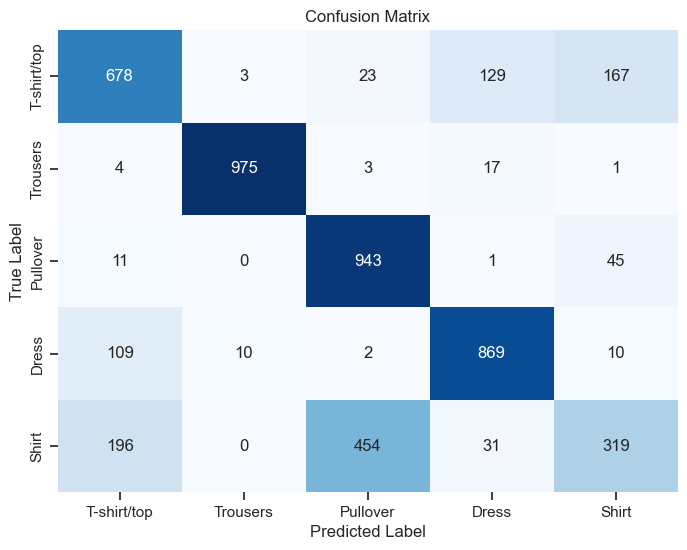

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_confusion_matrix(y_true, y_pred, class_names):
    """
    Calculate the confusion matrix.

    Parameters:
    - y_true: True class labels
    - y_pred: Predicted class labels
    - class_names: List of class names

    Returns:
    - confusion_matrix: Confusion matrix
    """
    num_classes = len(class_names)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true_label, pred_label in zip(y_true, y_pred):
        confusion_matrix[true_label, pred_label] += 1

    return confusion_matrix

def plot_confusion_matrix(confusion_matrix, class_names):
    """
    Plot the confusion matrix.

    Parameters:
    - confusion_matrix: Confusion matrix
    - class_names: List of class names
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage:
# Assuming y_test is the true labels for the test set
# Assuming predictions is the predicted labels for the test set
num_classes = len(np.unique(np.concatenate([y_test, predictions])))
class_names = [label_mapping_test[i] for i in range(num_classes)]
conf_matrix = calculate_confusion_matrix(y_test, predictions, class_names)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, class_names)


In [82]:
import numpy as np
from scipy.stats import multivariate_normal

# Load the Fashion MNIST training data
train_data = np.load('fashion_train.npy')

# Extract features (pixel values) and labels from the training data
X_train = train_data[:, :-1]
y_train = train_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping_train = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_train_strings = np.array([label_mapping_train[label] for label in y_train])

# Apply LDA to the training data
lda_components_train, explained_variance_train = lda(X_train, y_train, num_components=2)

# Project the training data onto the first two linear discriminant components
lda_projection_train = np.dot(X_train, lda_components_train)

# Load the Fashion MNIST test data
test_data = np.load('fashion_test.npy')

# Extract features (pixel values) and labels from the test data
X_test = test_data[:, :-1]  # Features (pixel values)
y_test = test_data[:, -1]

# Map integer labels to corresponding string labels
label_mapping_test = {0: "T-shirt/top", 1: "Trousers", 2: "Pullover", 3: "Dress", 4: "Shirt"}
y_test_strings = np.array([label_mapping_test[label] for label in y_test])

# Apply Linear Discriminant Analysis (LDA) to the test data
lda_components_test, explained_variance_test = lda(X_test, y_test, num_components=2)

# Project the test data onto the first two linear discriminant components
lda_projection_test = np.dot(X_test, lda_components_test)


def calculate_non_parametric_estimates(X_lda, y, num_components=2, bandwidth=0.001):
    """
    Calculate non-parametric estimates (Kernel Density Estimation) for each class.

    Parameters:
    - X_lda: Projected data onto the first two linear discriminant components (n_samples, num_components)
    - y: Class labels (n_samples,)
    - num_components: Number of linear discriminant components to use
    - bandwidth: Bandwidth for kernel density estimation

    Returns:
    - class_conditionals: List of multivariate normal distributions for each class
    """
    
    # Initialize an empty list to store the multivariate normal distributions for each class
    class_conditionals = []

    # Iterate over unique class labels in y
    for c in np.unique(y):
        # Extract data corresponding to the current class label
        class_data = X_lda[y == c]
        
        # Calculate the mean and covariance of the scaled class data
        class_mean = np.mean(class_data, axis=0)
        class_covariance = np.cov(class_data.T) + np.eye(num_components) * bandwidth
        
        # Create a multivariate normal distribution based on the mean and covariance
        kde = multivariate_normal(class_mean, class_covariance)
        
        # Append the multivariate normal distribution to the list
        class_conditionals.append(kde)

    # Return the list of multivariate normal distributions for each class
    return class_conditionals


def calculate_class_priors(y):
    """
    Calculate class priors.

    Parameters:
    - y: Class labels (n_samples,)

    Returns:
    - class_priors: Dictionary of class priors
    """
    
    # Initialize an empty dictionary to store class priors
    class_priors = {}
    
    # Get the total number of samples in the dataset
    total_samples = len(y)

    # Iterate over unique class labels in y
    for c in np.unique(y):
        # Calculate the class prior by dividing the number of samples in the class by the total number of samples
        class_priors[c] = len(y[y == c]) / total_samples

    # Return the dictionary of class priors
    return class_priors


def fit_naive_bayes_classifier(X, y, num_components=2, bandwidth=0.001):
    """
    Fit a Naive Bayes classifier.

    Parameters:
    - X: Data (n_samples, n_features)
    - y: Class labels (n_samples,)
    - num_components: Number of linear discriminant components to use
    - bandwidth: Bandwidth for kernel density estimation

    Returns:
    - class_conditionals: List of multivariate normal distributions for each class
    - class_priors: Dictionary of class priors
    """
    
    # Calculate non-parametric estimates (Kernel Density Estimation) for each class
    class_conditionals = calculate_non_parametric_estimates(X, y, num_components, bandwidth)
    
    # Calculate class priors
    class_priors = calculate_class_priors(y)

    # Return the resulting non-parametric estimates and class priors
    return class_conditionals, class_priors


def predict_proba_naive_bayes(X, class_conditionals, class_priors):
    """
    Predict class probabilities using the Naive Bayes classifier.

    Parameters:
    - X: Data (n_samples, n_features)
    - class_conditionals: List of multivariate normal distributions for each class
    - class_priors: Dictionary of class priors

    Returns:
    - posterior_probs: Predicted posterior probabilities
    """

    # Initialize an array to store likelihoods for each sample and each class
    likelihoods = np.zeros((len(X), len(class_conditionals)))

    # Iterate over each class and compute the likelihood for each sample
    for i, kde in enumerate(class_conditionals):
        # Scale the input data using min-max scaling with parameters from training data
        scaled_X = min_max_scaling_with_params(X, min_vals_train_lda, max_vals_train_lda, feature_range=(0, 1))
        # Compute the likelihood of the scaled data for the current class using the KDE
        likelihoods[:, i] = kde.pdf(scaled_X)

    # Initialize an array to store posterior probabilities for each sample and each class
    posterior_probs = np.zeros_like(likelihoods)

    # Multiply likelihoods by class priors to get posterior probabilities
    for i in range(len(class_conditionals)):
        posterior_probs[:, i] = likelihoods[:, i] * class_priors[i]

    # Normalize the posterior probabilities so that they sum to 1 for each sample
    row_sums = posterior_probs.sum(axis=1, keepdims=True)
    posterior_probs /= row_sums

    # Return the predicted posterior probabilities
    return posterior_probs


def predict_naive_bayes(X, class_conditionals, class_priors):
    """
    Predict class labels using the Naive Bayes classifier.

    Parameters:
    - X: Data (n_samples, n_features)
    - class_conditionals: List of multivariate normal distributions for each class
    - class_priors: Dictionary of class priors

    Returns:
    - predictions: Predicted class labels
    """

    # Use the predict_proba_naive_bayes function to get posterior probabilities
    posterior_probs = predict_proba_naive_bayes(X, class_conditionals, class_priors)

    # Find the index (class) with the highest posterior probability for each sample
    predictions = np.argmax(posterior_probs, axis=1)

    # Return the predicted class labels
    return predictions


# Example usage:
# Assuming lda_projection is the projected data from your LDA step
# Scale the training data
lda_projection_train_scaled = min_max_scaling_with_params(lda_projection_train, min_vals_train_lda, max_vals_train_lda, feature_range=(0, 1))
# Fit the Naive Bayes classifier without scaling the training data
class_conditionals, class_priors = fit_naive_bayes_classifier(lda_projection_train, y_train)

# Predict probabilities for new data points without scaling
# Assuming lda_projection_test is the projected data for the test set
predicted_probabilities = predict_proba_naive_bayes(lda_projection_test, class_conditionals, class_priors)

# Make predictions without scaling
predictions = predict_naive_bayes(lda_projection_test, class_conditionals, class_priors)

# Now you have predictions for the test set without scaling
print("Predictions without scaling:", predictions)




/var/folders/wk/rb21vvx97h93d00px44d7_yr0000gn/T/ipykernel_74352/2691559089.py:47: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eigenvalues, eigenvectors = eigh(between_class_scatter, within_class_scatter, eigvals=(num_features - num_components, num_features - 1))


Predictions without scaling: [1 3 3 ... 1 3 1]


In [83]:
def calculate_accuracy(y_true, y_pred):
    """
    Calculate the accuracy, precision, recall, and F1 score.

    Parameters:
    - y_true: True class labels
    - y_pred: Predicted class labels

    Returns:
    - accuracy: Accuracy score
    - precision: Precision score
    - recall: Recall score
    - f1: F1 score
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)

    # Accuracy
    accuracy = correct_predictions / total_samples

    # Confusion matrix
    confusion_matrix = np.zeros((5, 5))
    for true_label, pred_label in zip(y_true, y_pred):
        confusion_matrix[true_label, pred_label] += 1

    # Precision, Recall, and F1 Score
    precision = np.zeros(5)
    recall = np.zeros(5)
    f1 = np.zeros(5)

    for label in range(5):
        true_positives = confusion_matrix[label, label]
        false_positives = confusion_matrix[:, label].sum() - true_positives
        false_negatives = confusion_matrix[label, :].sum() - true_positives

        precision[label] = true_positives / (true_positives + false_positives + 1e-10)
        recall[label] = true_positives / (true_positives + false_negatives + 1e-10)
        f1[label] = 2 * (precision[label] * recall[label]) / (precision[label] + recall[label] + 1e-10)

    return accuracy, precision, recall, f1


In [84]:
# Example usage:
# Assuming y_test is the true labels for the test set
accuracy, precision, recall, f1 = calculate_accuracy(y_test, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 39.28%
Precision: [0.         0.4676259  0.         0.33927959 0.        ]
Recall: [0.    0.975 0.    0.989 0.   ]
F1 Score: [0.         0.63209076 0.         0.50523627 0.        ]


Confusion Matrix:
[[  0  14   0 986   0]
 [  0 975   0  25   0]
 [  0 850   0 150   0]
 [  0  11   0 989   0]
 [  0 235   0 765   0]]


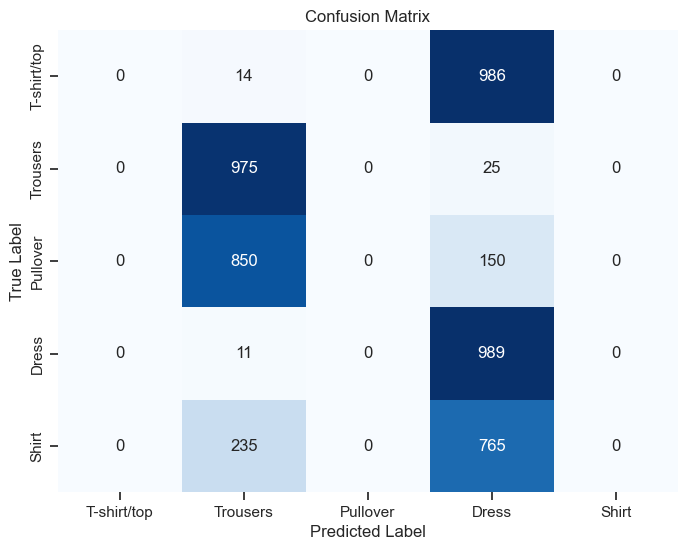

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_confusion_matrix(y_true, y_pred, class_names):
    """
    Calculate the confusion matrix.

    Parameters:
    - y_true: True class labels
    - y_pred: Predicted class labels
    - class_names: List of class names

    Returns:
    - confusion_matrix: Confusion matrix
    """
    num_classes = len(class_names)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true_label, pred_label in zip(y_true, y_pred):
        confusion_matrix[true_label, pred_label] += 1

    return confusion_matrix

def plot_confusion_matrix(confusion_matrix, class_names):
    """
    Plot the confusion matrix.

    Parameters:
    - confusion_matrix: Confusion matrix
    - class_names: List of class names
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage:
# Assuming y_test is the true labels for the test set
# Assuming predictions is the predicted labels for the test set
num_classes = len(np.unique(np.concatenate([y_test, predictions])))
class_names = [label_mapping_test[i] for i in range(num_classes)]
conf_matrix = calculate_confusion_matrix(y_test, predictions, class_names)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, class_names)


## Second classifier

## Third classifier